# 1. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools

In [2]:
current_path = os.getcwd()

In [3]:
data_set = pd.read_csv(current_path + "\\Dataset\\precision_agriculture_patents.csv", low_memory=False) 

In [4]:
data_set.shape

(72224, 15)

In [5]:
data_set.head(3)

,Publication_Number,Publication_Year,Title,Applicants,IPCR_Classifications,Main_Class,Main_Subclass,Abstract,Claims_count,Citation_count,Citation_ids,Citation_dates,Cited_count,Cited_ids,Cited_dates
0,US 2015/0302305 A1,2015,Generating An Agriculture Prescription,CLIMATE CORP,G06N5/04;;A01B79/00;;A01C21/00,A01,G06N,A method begins by agriculture equipment colle...,18,3,US5721679A;;US20060037520A1;;US20140012732A1,1995-12-18;;2004-08-17;;2010-10-25,16,US20160063415A1;;US20160065532A1;;US2016009312...,2014-06-18;;2014-08-29;;2014-09-30;;2015-02-06...
1,US 2018/0263171 A1,2018,Generating An Agriculture Prescription,CLIMATE CORP,A01B79/00,A01,A01B,A method begins by agriculture equipment colle...,20,0,NaN,NaN,0,NaN,NaN
2,US 2009/0099737 A1,2009,Method And Apparatus For Optimization Of Agric...,WENDTE KEITH W;;RUND MARTIN,G06F7/00;;G01W1/00,G06,G06F,An agricultural system which includes at least...,27,9,US5740038A;;US5842307A;;US5884224A;;US5913915A...,1996-09-26;;1996-11-15;;1997-03-07;;1997-09-30...,35,US20100071329A1;;US20110084851A1;;US2011015314...,2008-09-19;;2009-10-12;;2009-12-22;;2009-12-29...


### 1.1 General trend of precision agriculture sector

In [6]:
s = data_set['Publication_Year'].value_counts().sort_values(ascending=True)

In [7]:
s.sort_index(inplace=True)

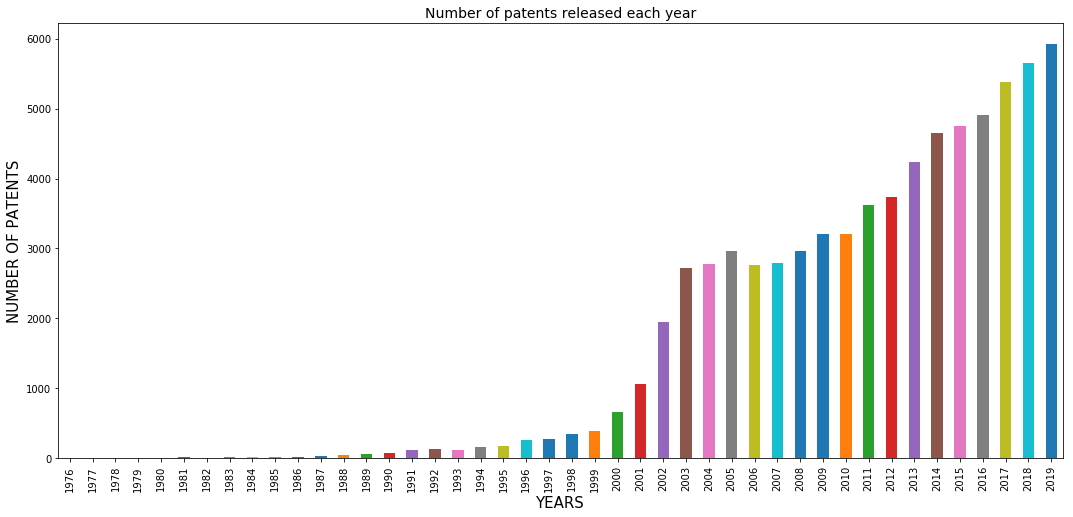

In [8]:
s.plot.bar(figsize=(18,8))
plt.title('Number of patents released each year', size=14)
plt.xlabel("YEARS", size=15)
plt.ylabel("NUMBER OF PATENTS", size=15)
plt.show()

In [9]:
data_set = data_set.loc[data_set["Publication_Year"] >= 2000].reset_index(drop=True)

### 1.2 Actors analysis

In [10]:
applicants = data_set['Applicants'].value_counts().sort_values(ascending=True)

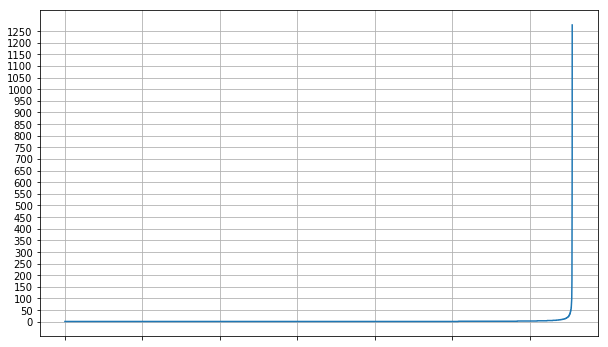

In [11]:
plt.yticks(range(0,max(applicants),50))
applicants.plot(figsize=(10,6))
plt.grid()

In [12]:
# Remove actors that released less patents than the threshold
index = 0
threshold = 210
top_companies_patents = 0
other_companies_patents = 0
for applicant,num_patents in applicants.items():
    if num_patents < threshold:
        index = index + 1
        other_companies_patents += num_patents
    else:
        top_companies_patents += num_patents

applicants = applicants[index:]

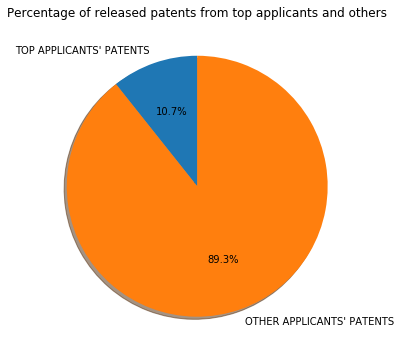

In [13]:
patents_distribution = [top_companies_patents,other_companies_patents]
labels_pat = ['TOP APPLICANTS\' PATENTS', 'OTHER APPLICANTS\' PATENTS']
plt.figure(figsize=(6,6))
plt.pie(patents_distribution, labels=labels_pat, startangle=90, autopct='%.1f%%', shadow=True)
plt.title('Percentage of released patents from top applicants and others')
plt.show()

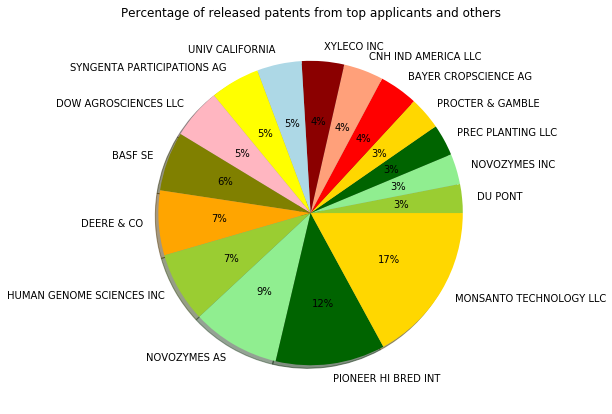

In [14]:
plt.ylabel("",size=0, color='white')
plt.title('Percentage of released patents from top applicants and others')
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred', 'lightblue', 'yellow', 'lightpink', 'olive', 'orange']
x = applicants.plot.pie(figsize=(7,7), autopct='%1.0f%%',colors=colors, shadow=True)

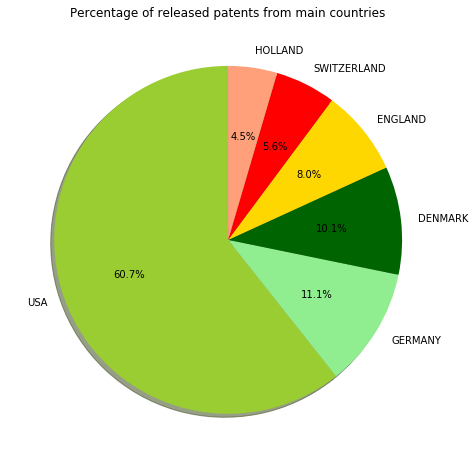

In [15]:
patents_distribution_in_countries = [4230, 776, 701, 557, 393, 317]
labels_pat = ['USA', 'GERMANY', 'DENMARK', 'ENGLAND', 'SWITZERLAND', 'HOLLAND']
plt.figure(figsize=(8,8))
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon']
plt.pie(patents_distribution_in_countries, labels=labels_pat, colors=colors, startangle=90, autopct='%.1f%%', shadow=True)
plt.title('Percentage of released patents from main countries')
plt.show()

In [16]:
applicants.sort_values(ascending=False)

MONSANTO TECHNOLOGY LLC       1276
PIONEER HI BRED INT            869
NOVOZYMES AS                   701
HUMAN GENOME SCIENCES INC      557
DEERE & CO                     514
BASF SE                        471
DOW AGROSCIENCES LLC           401
SYNGENTA PARTICIPATIONS AG     393
UNIV CALIFORNIA                355
XYLECO INC                     336
CNH IND AMERICA LLC            317
BAYER CROPSCIENCE AG           305
PROCTER & GAMBLE               261
PREC PLANTING LLC              250
NOVOZYMES INC                  242
DU PONT                        229
Name: Applicants, dtype: int64

# 2. Extraction of subclasses

### 2.1 Approach 1

#### 2.1.1 Extraction of subclasses more frequent

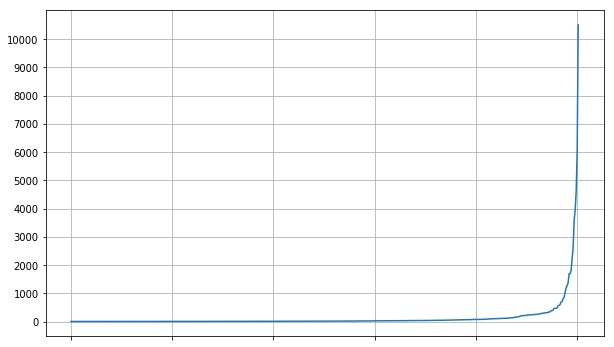

In [17]:
s = data_set.Main_Subclass.value_counts().sort_values(ascending=True)
plt.yticks(range(0,max(s),1000))
s.plot(figsize=(10,6))
plt.grid()

In [18]:
# Remove subclasses that released less patent than the threshold
threshold = 200
subclasses_code_list_1 = []
for k, val in data_set.Main_Subclass.value_counts().items():
    if val > threshold:
        subclasses_code_list_1.append(k)


In [19]:
print(subclasses_code_list_1)

['C12N', 'A61K', 'A01H', 'G01N', 'A01N', 'C07K', 'C12Q', 'C12P', 'A01G', 'A01C', 'G06F', 'C07D', 'G06Q', 'A61P', 'A01B', 'C02F', 'A23L', 'A01D', 'C07C', 'B01D', 'B01J', 'G06K', 'G01S', 'A01K', 'C08L', 'A61B', 'G05D', 'C08F', 'B32B', 'A23K', 'B05B', 'C12M', 'A01M', 'C40B', 'G05B', 'C07H', 'C10L', 'A61L', 'G06T', 'C08K', 'B65D', 'B29C', 'C08G', 'H04L', 'B62D', 'G01J', 'C05F', 'A01F', 'G01C', 'C11D', 'B01L', 'C05G', 'H01L', 'F16H', 'H04W', 'A01P']


#### 2.1.2 Extraction of subclasses most cited

In [20]:
dd = data_set[["Main_Subclass", "Cited_count"]]
grouped = dd.groupby(['Main_Subclass'])['Cited_count'].sum().reset_index()
grouped = grouped.sort_values(by=['Cited_count'], ascending=True).reset_index(drop=True)

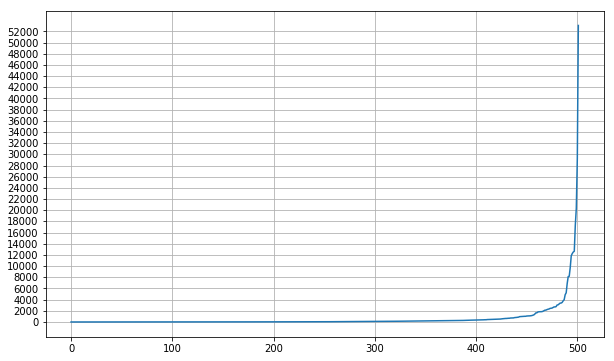

In [21]:
s = grouped.Cited_count
plt.yticks(range(0,int(max(s)),2000))
s.plot(figsize=(10, 6))
plt.grid()

In [22]:
threshold = 2000
grouped = grouped.loc[grouped["Cited_count"] > threshold]

In [23]:
subclasses_code_list_2 = list(grouped.Main_Subclass)

In [24]:
print(subclasses_code_list_2)

['C07H', 'A61L', 'C08F', 'B01J', 'C08L', 'H04L', 'C07C', 'H05B', 'A01B', 'H01L', 'A23L', 'G05D', 'G01S', 'E21B', 'C40B', 'C02F', 'H01F', 'G06K', 'B01D', 'A01C', 'A61B', 'A61P', 'A01G', 'C07D', 'H02J', 'C12P', 'A01H', 'C12Q', 'A01N', 'G06Q', 'C07K', 'G06F', 'G01N', 'A61K', 'C12N']


### 2.2 Approach 2

#### 2.2.1 Extraction of subclasses from patents most cited

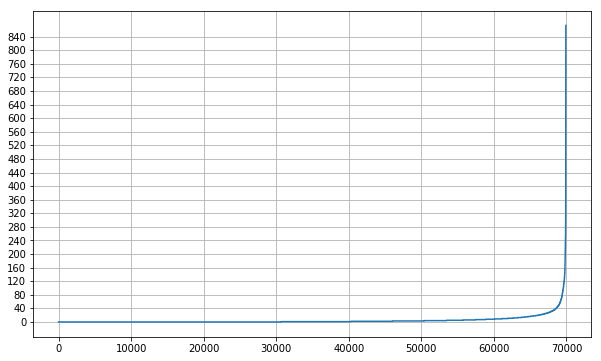

In [25]:
s = pd.Series(data_set.Cited_count.sort_values(ascending=True).values)
plt.yticks(range(0,max(s),40))
s.plot(figsize=(10, 6))
plt.grid()

In [26]:
threshold = 120
dd = data_set.copy()
dd = dd.loc[dd["Cited_count"] > threshold]

In [27]:
subclasses_code_list_3 = list(dd.Main_Subclass.value_counts().index)

In [28]:
print(subclasses_code_list_3)

['C12N', 'H02J', 'G06F', 'G06Q', 'C07K', 'H01F', 'A61K', 'A61B', 'H05B', 'H01L', 'C07D', 'A01H', 'H04L', 'G01N', 'A01N', 'C12Q', 'A63F', 'B60L', 'B60Q', 'G06K', 'G08B', 'G01C', 'B01D', 'A61L', 'G10L', 'G05D', 'H01P', 'B01F', 'G06G', 'B24D', 'G09G', 'C08B', 'G09B', 'A61P', 'H03B', 'C40B', 'F24S', 'C08F', 'H04N', 'B24B', 'H04Q', 'H01B', 'A61F', 'H04W', 'G01P', 'C09D', 'C12P', 'G01S', 'G05B', 'A23K']


### 2.3 Approach 3

#### 2.3.1 IPC co-classification occurences computation

In [29]:
def updateDictionary(dictionary, ipcr1, ipcr2):
    key = ipcr1 + "$" + ipcr2
    if key not in dictionary:
        dictionary[key] = 1
    else: dictionary[key]+=1

In [30]:
def cutsubgroups(listIPCR):
    newIpcrList = []
    for ipcr in listIPCR:
        newIpcrList.append(ipcr.split('/', 1)[0][:4])        
    return newIpcrList

In [31]:
Dict = {}
for idx in range(len(data_set)):
    id_IPCR = data_set.IPCR_Classifications[idx].split(";;")
    id_IPCR = cutsubgroups(id_IPCR)
    id_IPCR = list(set(id_IPCR))
    combo_values = list(itertools.combinations(id_IPCR, 2))
    for combo in combo_values:
        updateDictionary(Dict,combo[0], combo[1])

In [32]:
co_occurences = list(Dict.values())
co_occurences.sort()

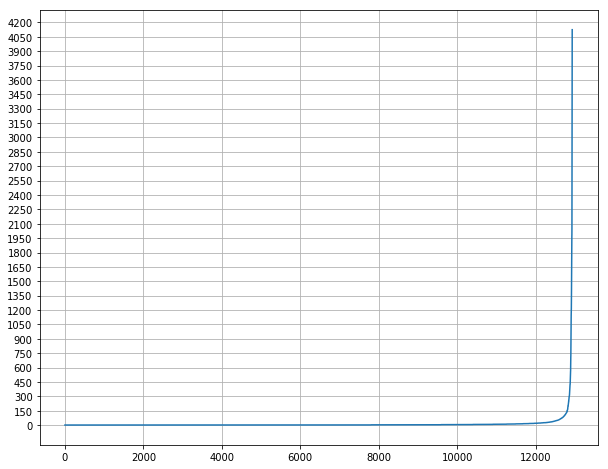

In [33]:
s = pd.Series(co_occurences)
plt.yticks(range(0,max(co_occurences)+200,150))
s.plot(figsize=(10, 8))
plt.grid()

In [34]:
# delete elements with a low value
threshold = 100
for k, v in list(Dict.items()):
    if v < threshold:
        del Dict[k]

In [35]:
df_FromTo = pd.DataFrame()
df_FromTo["Source"] = ""
df_FromTo["Target"] = ""
df_FromTo["Weight"] = 0

In [36]:
idx = 0
for k, v in Dict.items():
    from_to = k.split("$")
    df_FromTo.at[idx,"Source"] = from_to[0]
    df_FromTo.at[idx,"Target"] = from_to[1]
    df_FromTo.at[idx,"Weight"] = v
    idx = idx + 1

In [37]:
df1 = df_FromTo.copy()
df2 = pd.DataFrame(columns=df_FromTo.columns)

df2.Source = df1.Target
df2.Target = df1.Source
df2.Weight = df1.Weight

In [38]:
values_added = []
new_df = pd.DataFrame(columns=df_FromTo.columns)
idx = 0
for idx_df1 in range(0,len(df1) - 1):
    found = 0
    for idx_df2 in range(idx_df1+1, len(df2)):
        s = df1.loc[idx_df1,"Source"]
        t = df1.loc[idx_df1,"Target"]
        if df2.loc[idx_df2,"Source"] == s and df2.loc[idx_df2,"Target"] == t:
            found = 1
            new_df.loc[idx,"Source"] = df1.loc[idx_df1,"Source"]
            new_df.loc[idx,"Target"] = df1.loc[idx_df1,"Target"]
            new_df.loc[idx,"Weight"] = int(df1.loc[idx_df1,"Weight"]) + int(df2.loc[idx_df2,"Weight"])
            idx+=1
            s1 = s+"$"+t
            s2 = t+"$"+s
            values_added.append(s1)
            values_added.append(s2)            
            break 

In [39]:
idx = len(new_df)
for idx_df1 in range(0,len(df1)):
    found = 0
    s = df1.loc[idx_df1,"Source"]
    t = df1.loc[idx_df1,"Target"]    
    s1 = s+"$"+t
    if s1 not in values_added:
        new_df.loc[idx,"Source"] = df1.loc[idx_df1,"Source"]
        new_df.loc[idx,"Target"] = df1.loc[idx_df1,"Target"]
        new_df.loc[idx,"Weight"] = int(df1.loc[idx_df1,"Weight"])
        idx+=1

In [40]:
new_df.head(3)

,Source,Target,Weight
0,G01N,C12Q,2551
1,C12Q,C12N,3401
2,G01N,C12N,2040


In [41]:
new_df.to_csv(current_path+"\\DatasetNetworkAnalysis\\GrafoIPCR.csv", index=False)

##### After the analysis with Gephi we obtain the subclasses with high Centrality degree and Betweeneess Centrality

#### 2.3.2 Subclasses with high Centrality Degree

In [42]:
df_degree = pd.read_csv(current_path+"\\DatasetNetworkAnalysis\\DegreeCentrality.csv")

In [43]:
df_degree = df_degree.sort_values(by=["Weighted_Degree"], ascending=False).reset_index(drop=True)

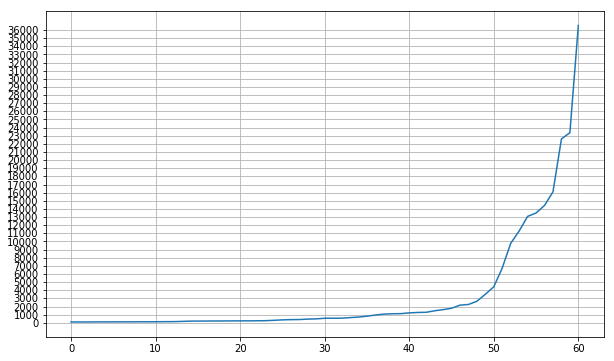

In [44]:
s = pd.Series(df_degree.Weighted_Degree.sort_values(ascending=True).values)
plt.yticks(range(0,max(s),1000))
s.plot(figsize=(10, 6))
plt.grid()

In [45]:
threshold = 2000
df_degree = df_degree.loc[df_degree["Weighted_Degree"] > threshold]

In [46]:
subclasses_code_list_4 = list(df_degree.Id)

In [47]:
print(subclasses_code_list_4)

['C12N', 'C07K', 'A61K', 'C12Q', 'C12P', 'G01N', 'A01H', 'A61P', 'C07H', 'A01N', 'A23L', 'C07D', 'A01K', 'A01P', 'C11B']


#### 2.3.3 Subclasses with high Betweeness Centrality

In [48]:
df_betweeness = pd.read_csv(current_path+"\\DatasetNetworkAnalysis\\BetweenessCentrality.csv")

In [49]:
df_betweeness = df_betweeness.loc[df_betweeness["betweenesscentrality"] > 0]

In [50]:
subclasses_code_list_5 = list(df_betweeness.Id)

In [51]:
print(subclasses_code_list_5)

['A01C', 'A01B', 'G01N', 'C12Q', 'C12N', 'C07K', 'A23L', 'A01N', 'A01H', 'C08L', 'C08J', 'C12P', 'C40B', 'C07H', 'A61P', 'A01G', 'A01D', 'G06F', 'G06K', 'H04L', 'C07D', 'C07C', 'A01P', 'C05G', 'A61K', 'C10L', 'C08G', 'G05B', 'B01J']


In [52]:
extracted_subclasses = list(set(subclasses_code_list_1 + subclasses_code_list_2 + subclasses_code_list_3 + subclasses_code_list_4 + subclasses_code_list_5))

In [53]:
print(extracted_subclasses)

['B62D', 'C08K', 'A01P', 'C12M', 'C02F', 'C07K', 'C08F', 'C11D', 'G06T', 'G08B', 'A61F', 'B05B', 'H01L', 'H04Q', 'H04L', 'G06G', 'B29C', 'H01P', 'A01F', 'A01K', 'B01D', 'A61P', 'C12N', 'C08B', 'C07C', 'C05F', 'C12Q', 'C05G', 'A01C', 'A61K', 'A01H', 'H03B', 'A23K', 'G01P', 'B01L', 'A01D', 'B24D', 'F24S', 'C40B', 'C07D', 'G09B', 'A61B', 'A61L', 'C08J', 'E21B', 'A23L', 'C08L', 'A01M', 'B60L', 'B60Q', 'G06Q', 'C11B', 'C12P', 'G01S', 'G09G', 'B24B', 'A01G', 'C09D', 'C07H', 'A01N', 'F16H', 'G05D', 'B65D', 'G01C', 'A01B', 'G01J', 'G06K', 'C08G', 'G01N', 'G06F', 'H02J', 'A63F', 'H04W', 'G10L', 'B32B', 'B01J', 'H01B', 'B01F', 'H04N', 'H05B', 'H01F', 'C10L', 'G05B']


#### Creation of the file containing all the subclasses obtained from the 3 approaches

In [54]:
f = open(current_path + "\\OutputFiles\\List of subclasses.txt", "w")
for sc in extracted_subclasses:
    f.write(sc +'\n')
f.close()

# 3. Trend Analysis for each extracted subclass 

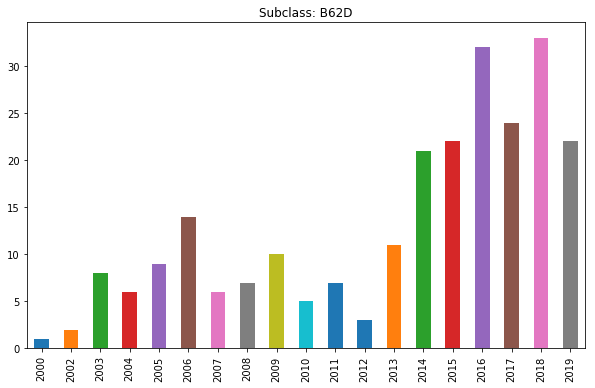

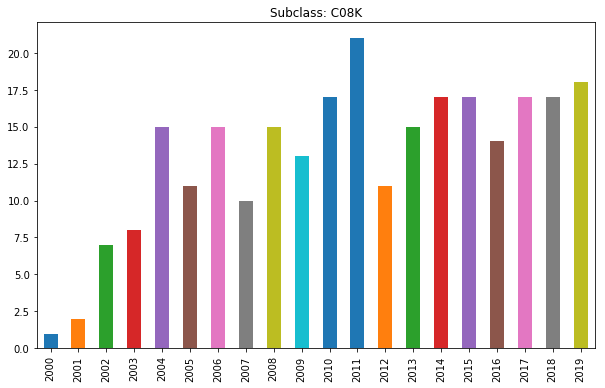

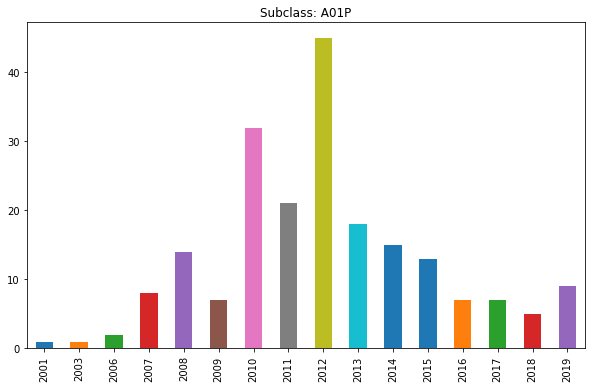

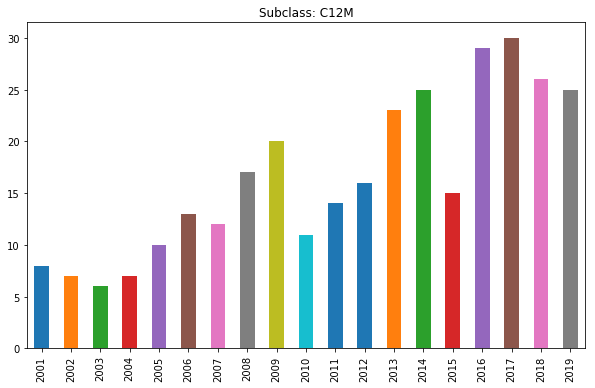

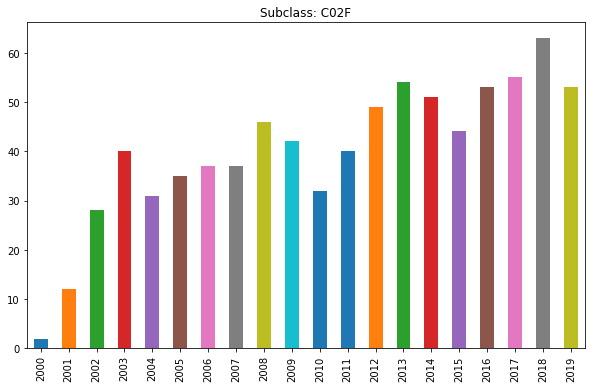

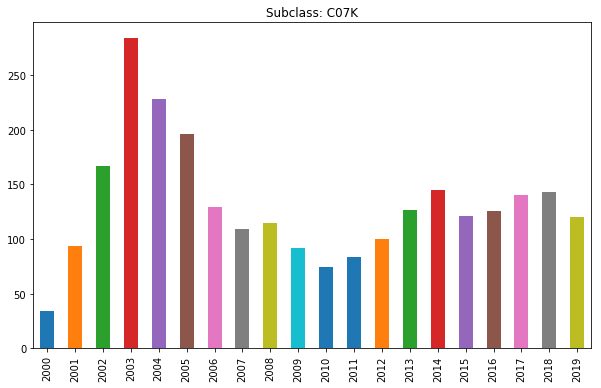

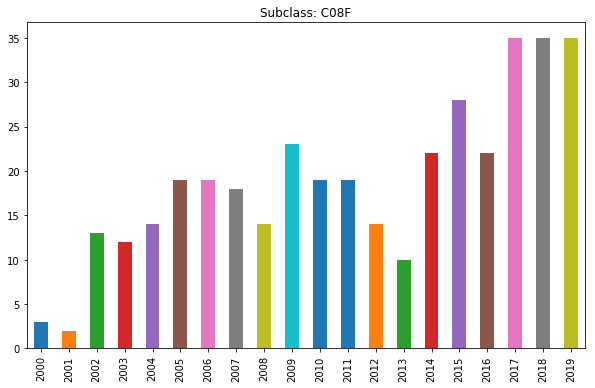

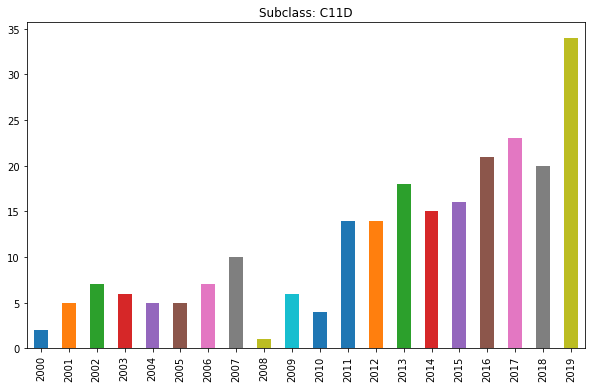

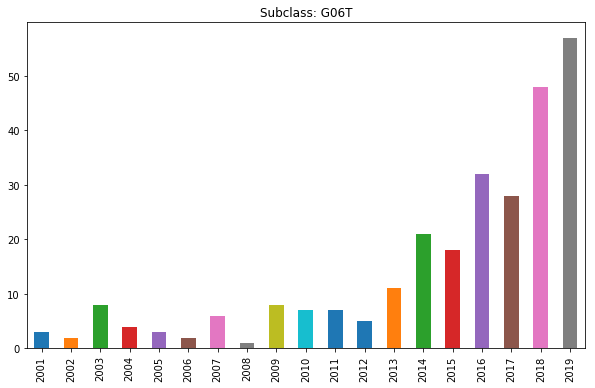

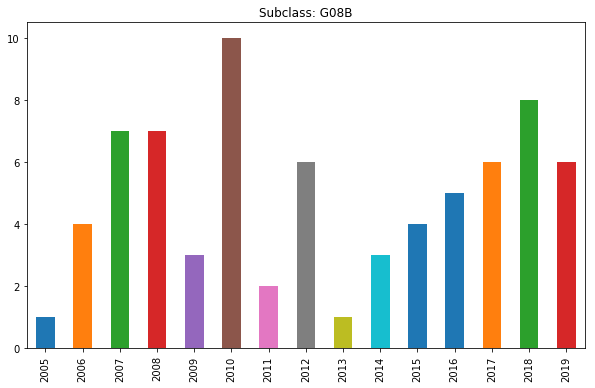

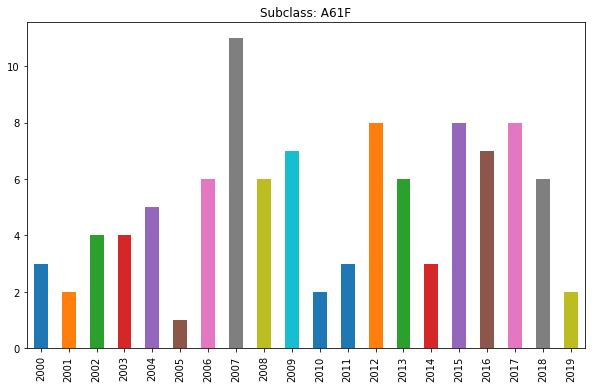

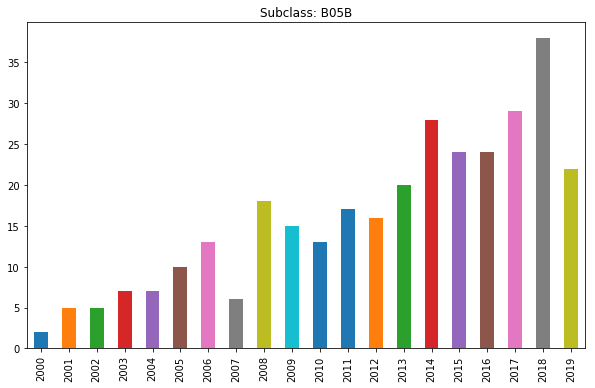

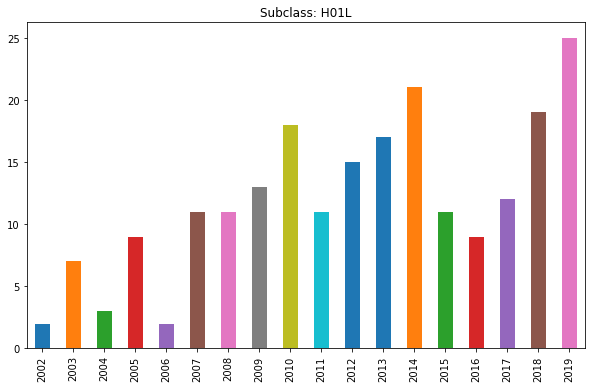

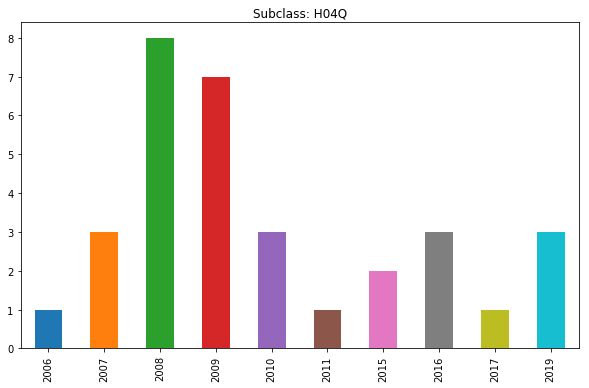

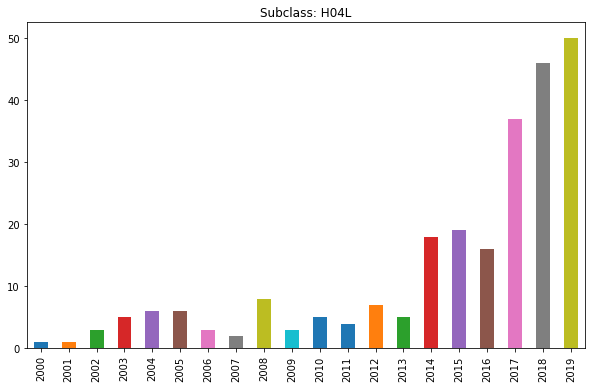

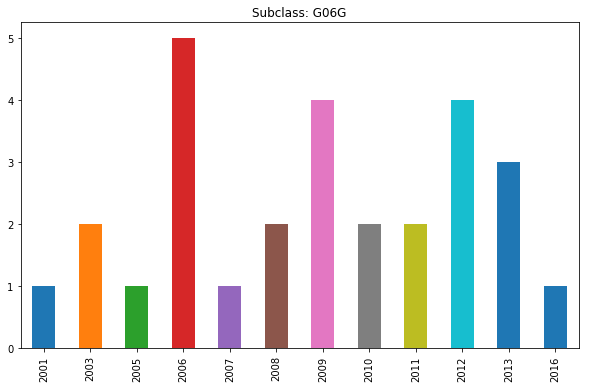

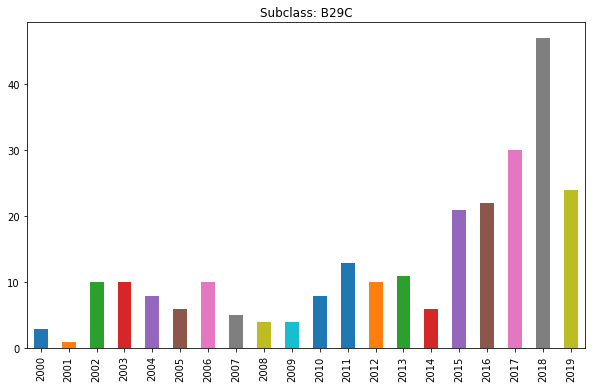

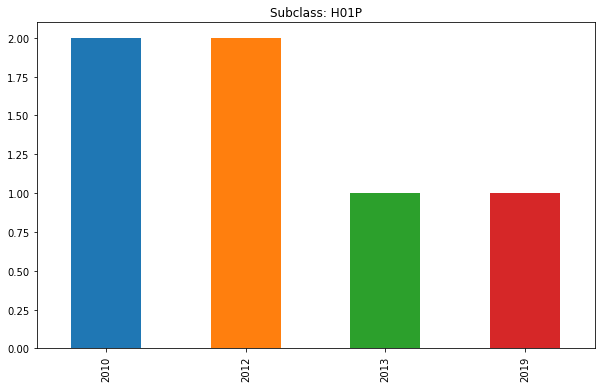

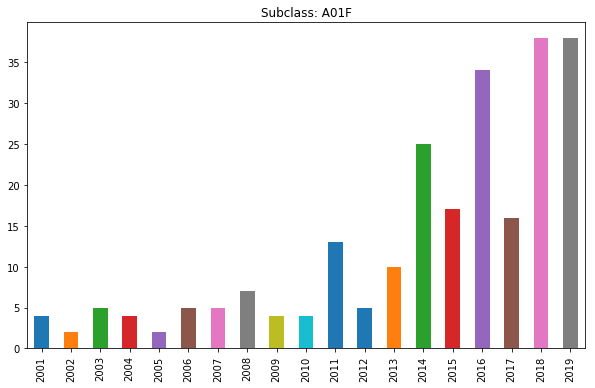

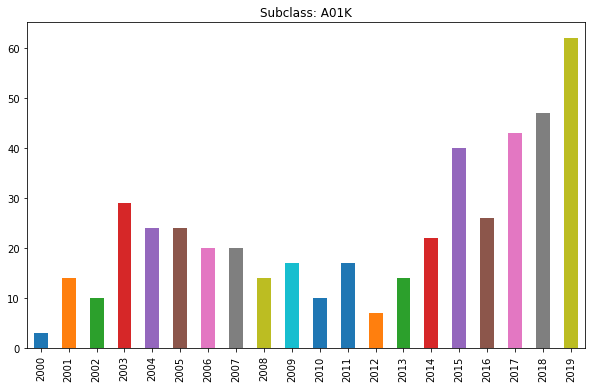

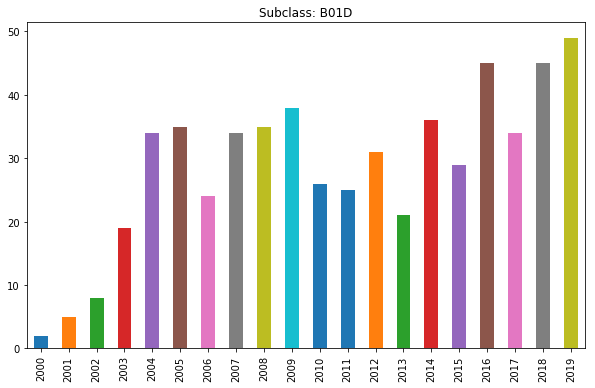

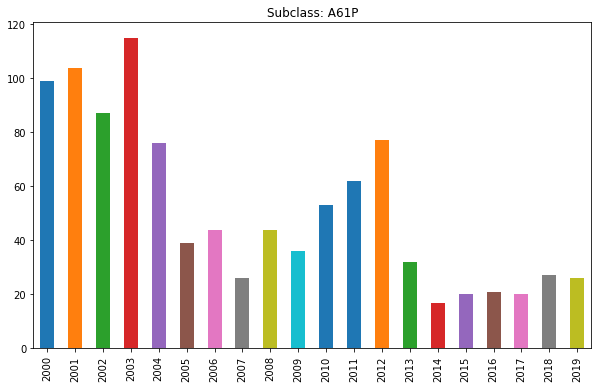

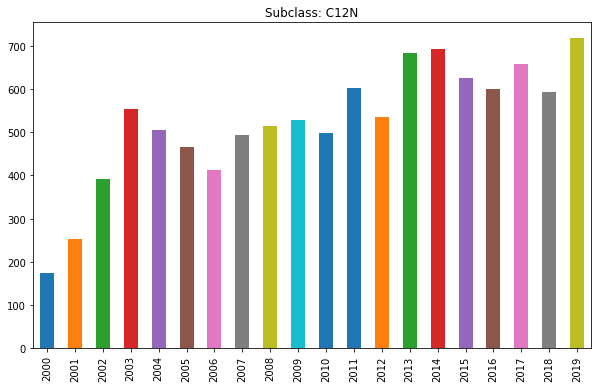

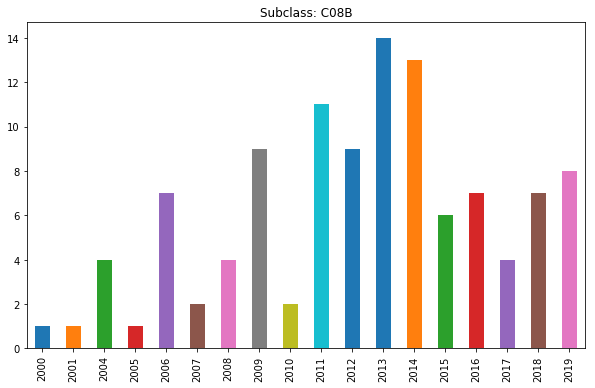

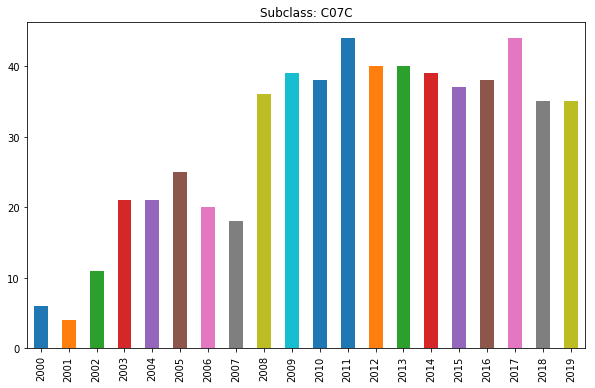

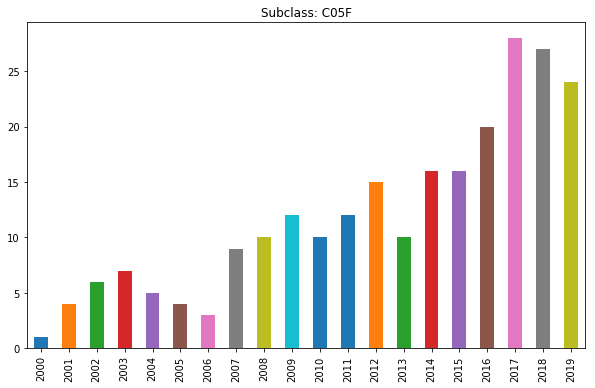

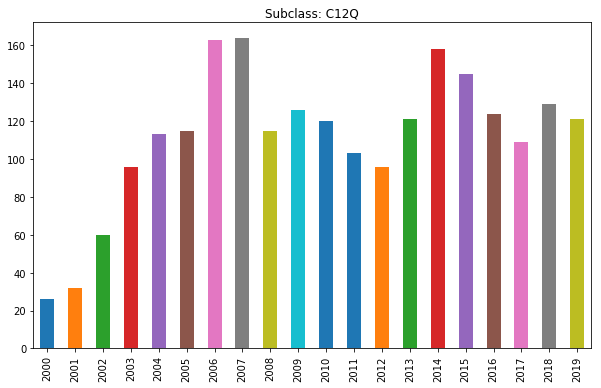

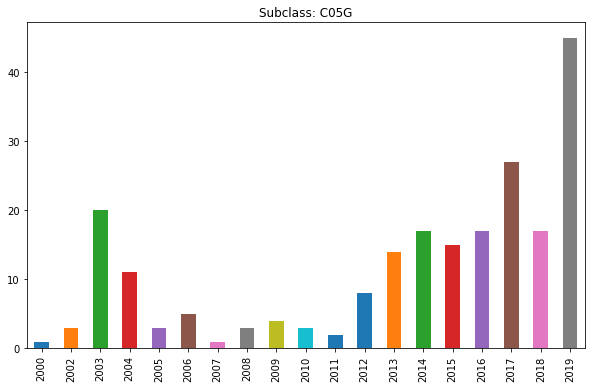

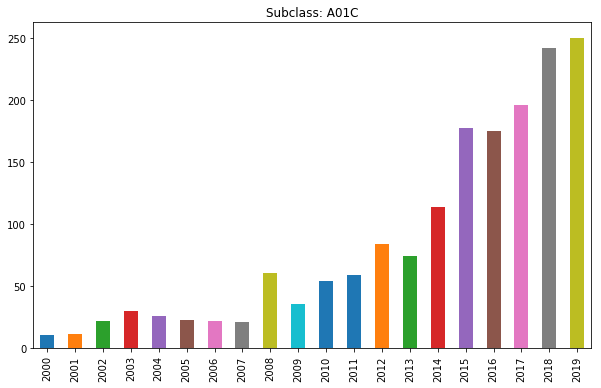

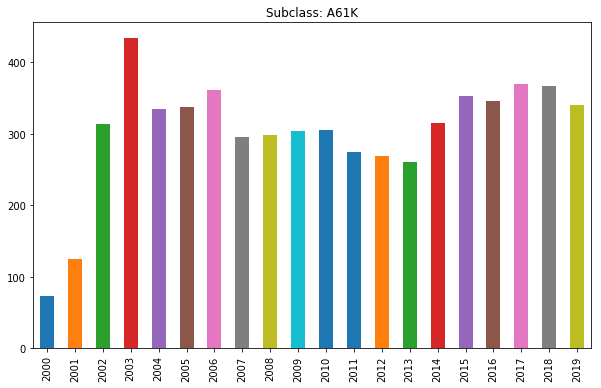

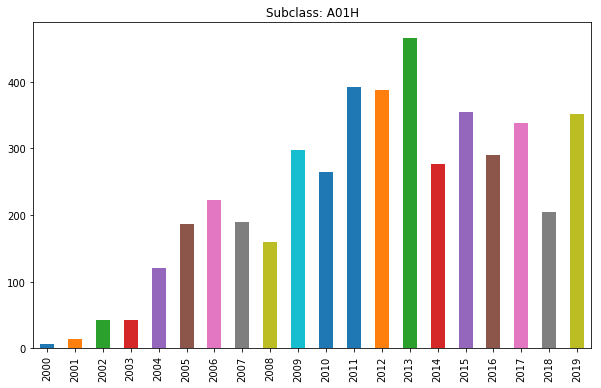

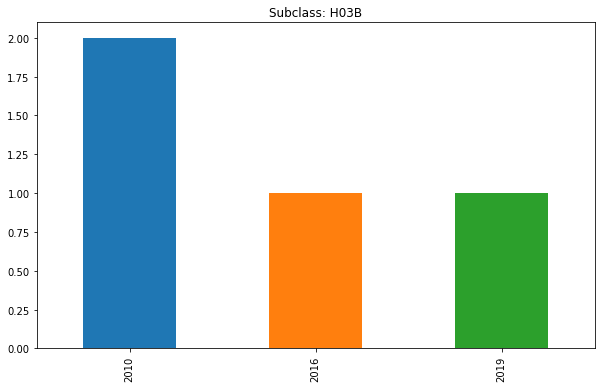

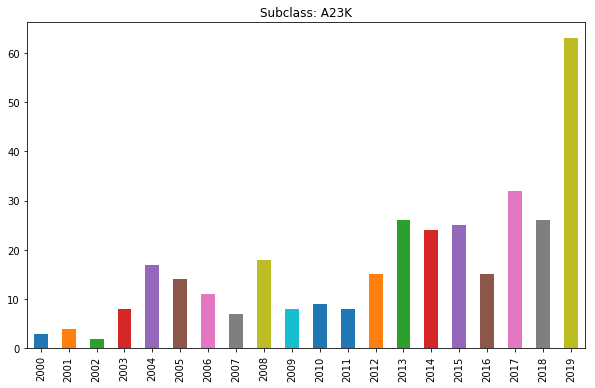

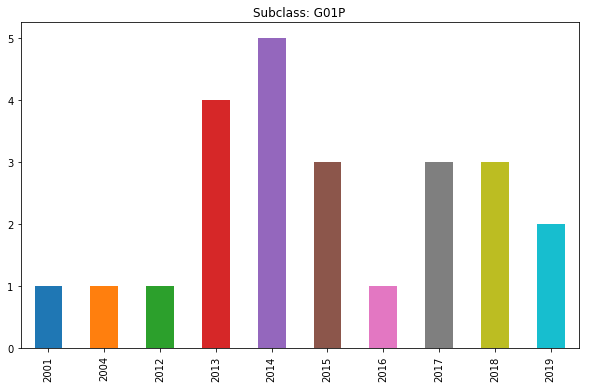

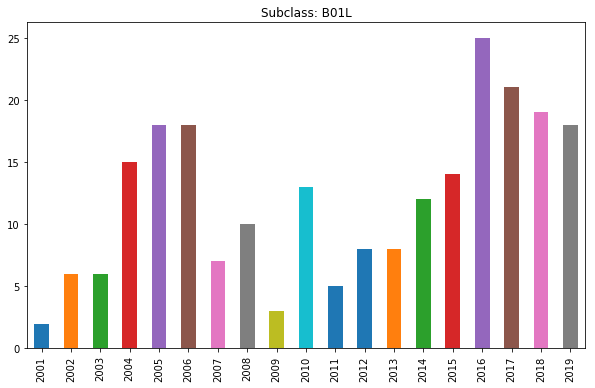

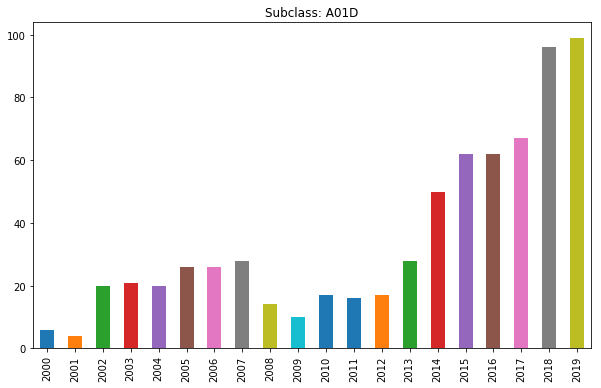

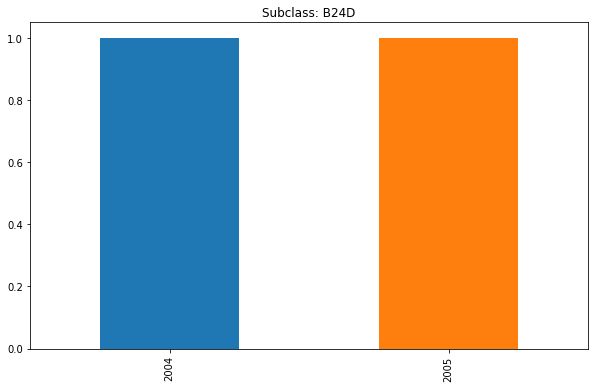

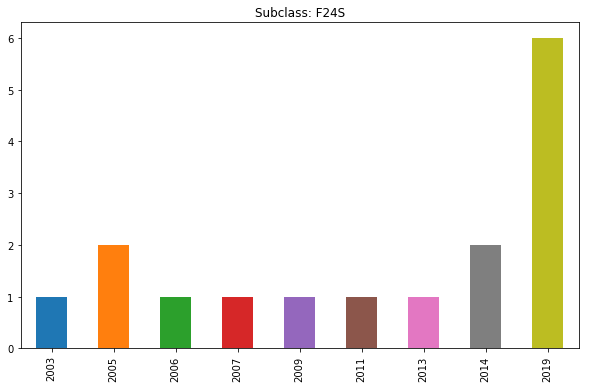

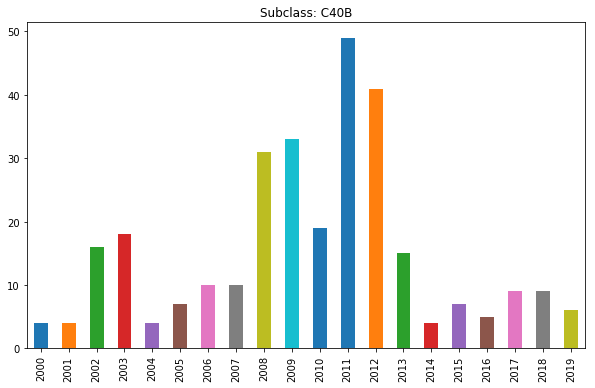

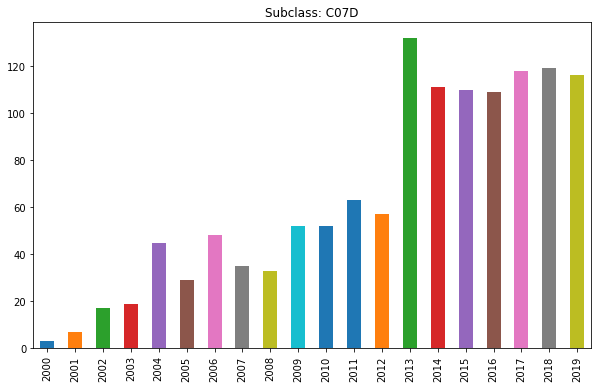

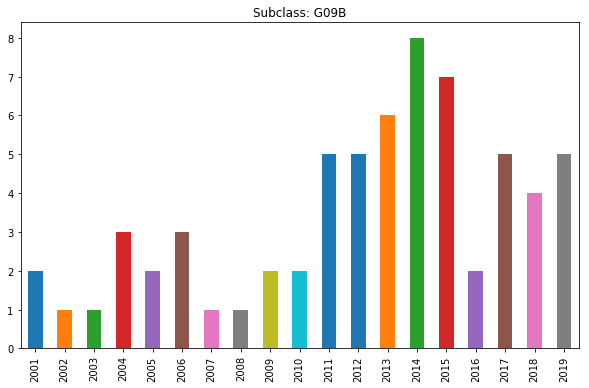

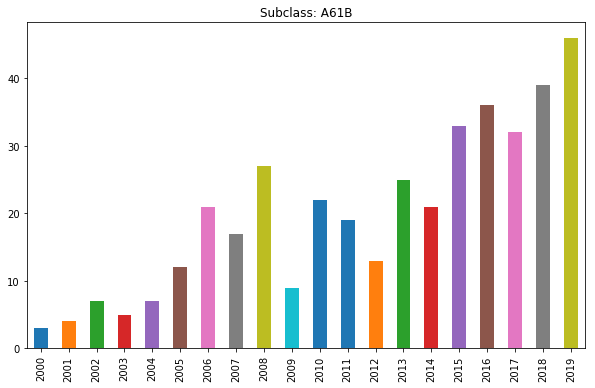

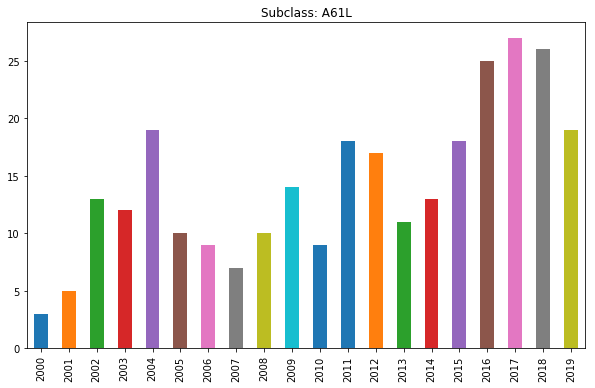

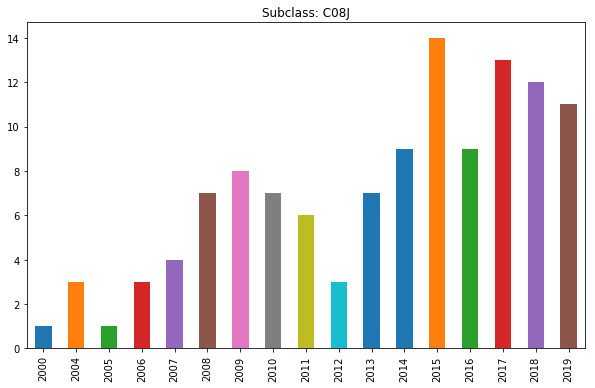

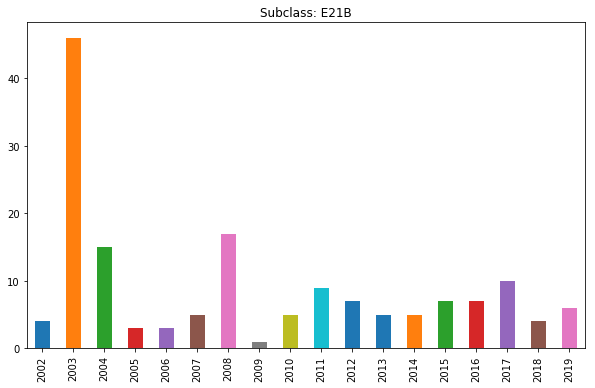

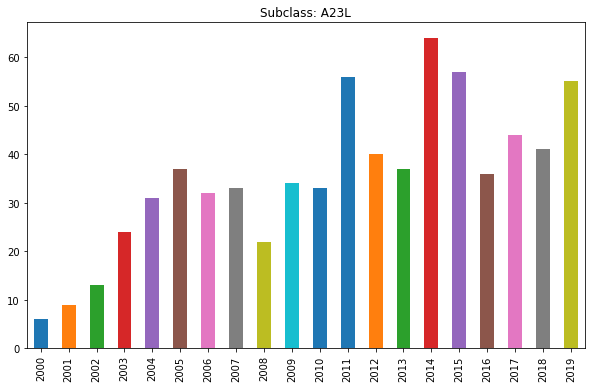

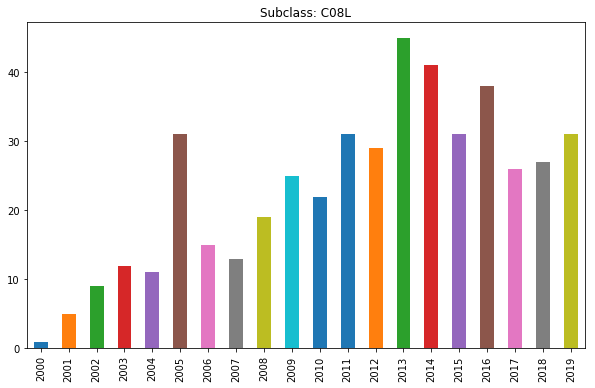

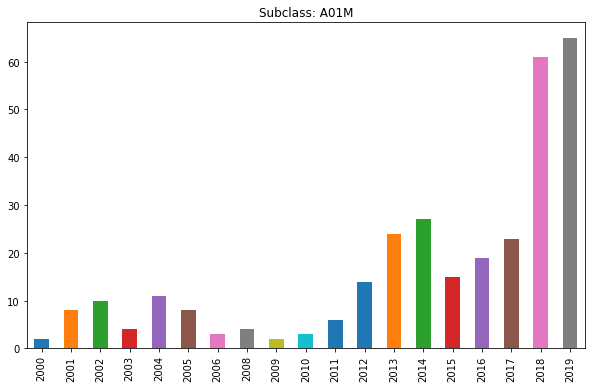

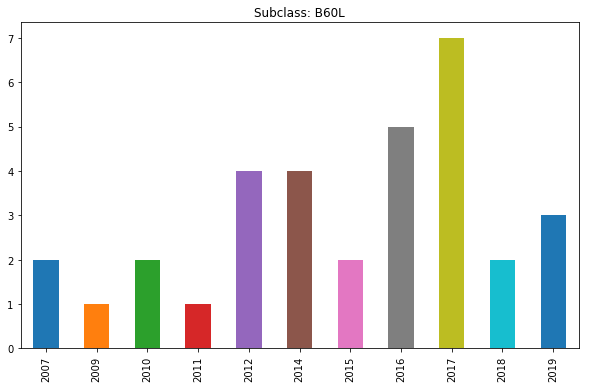

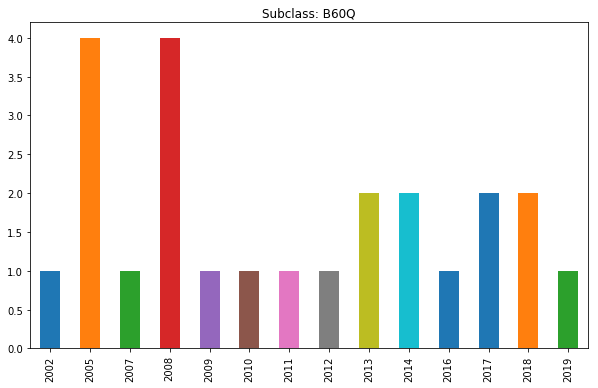

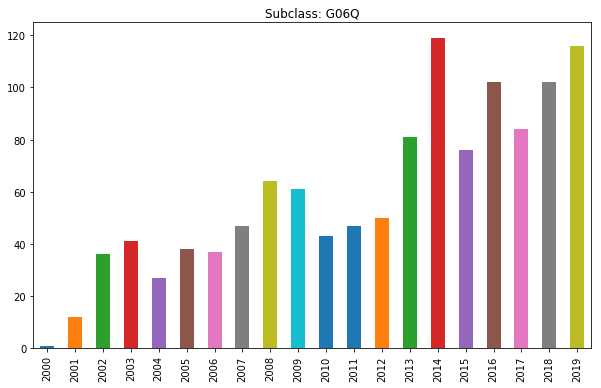

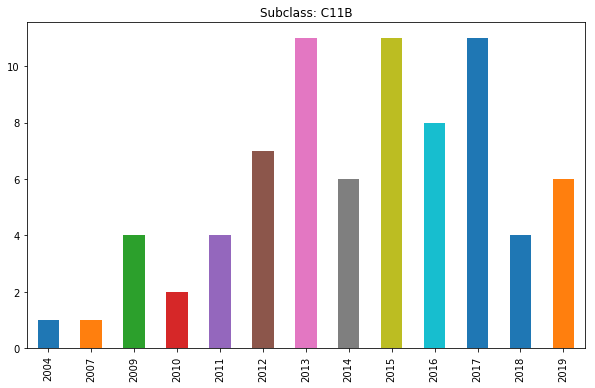

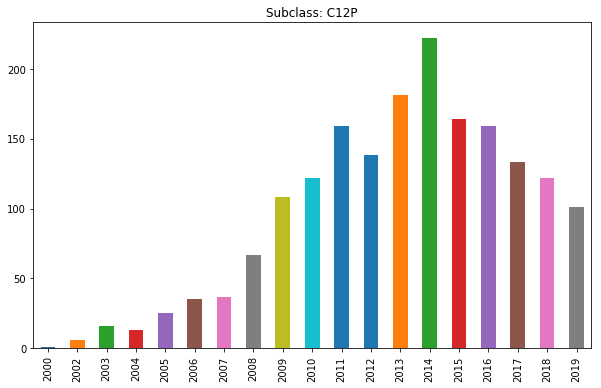

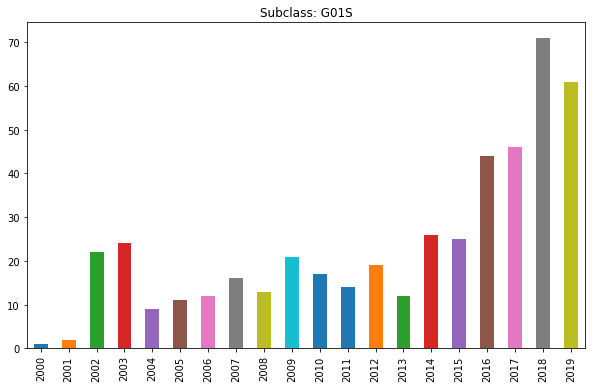

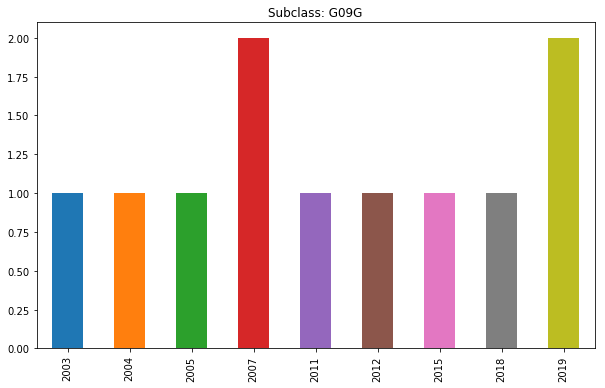

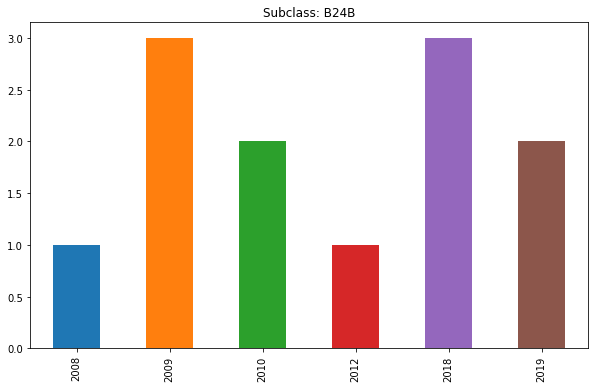

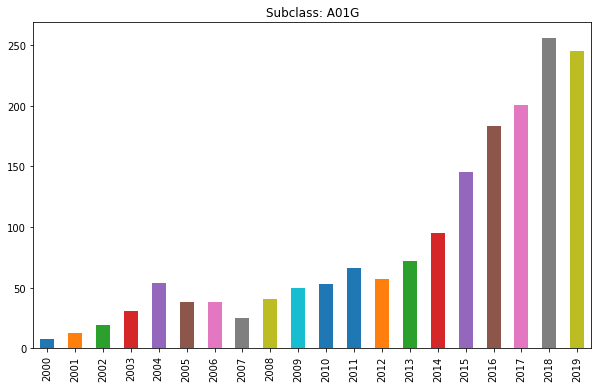

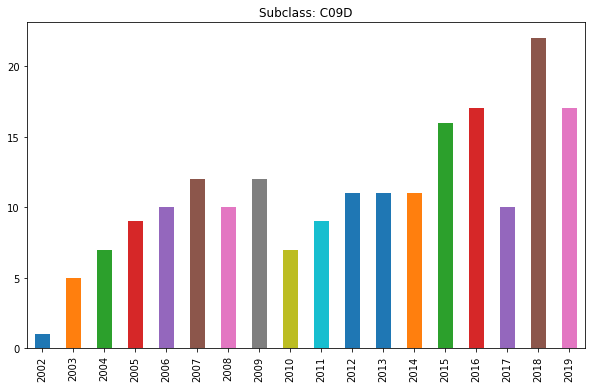

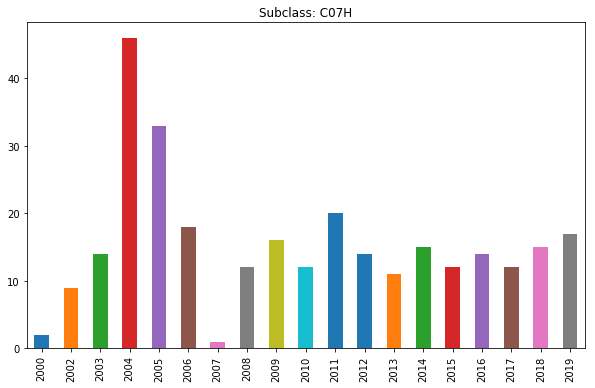

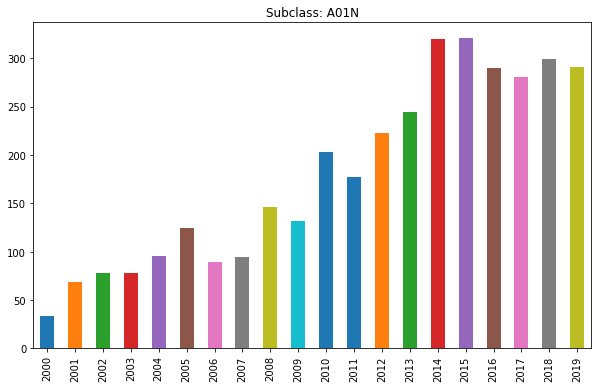

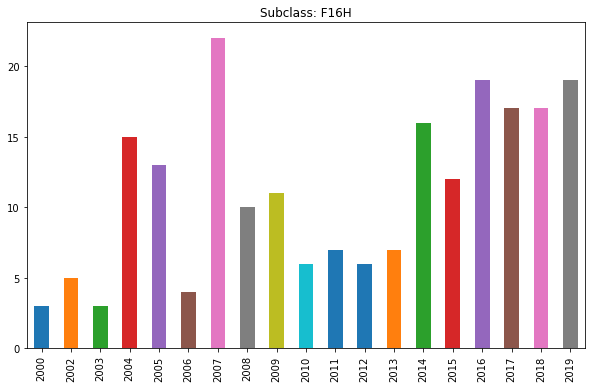

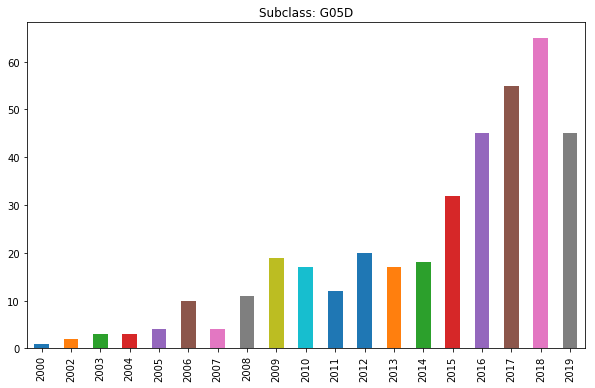

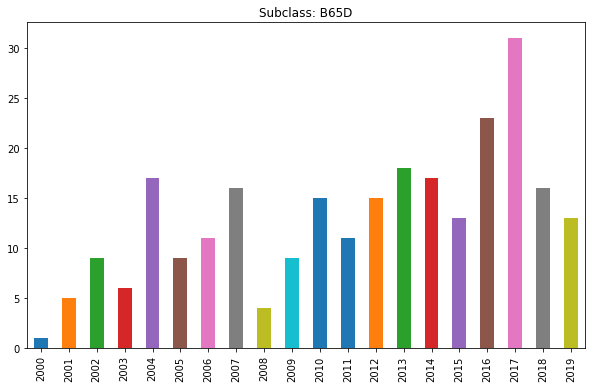

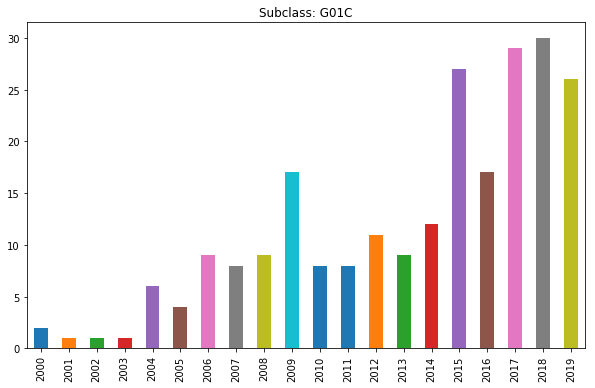

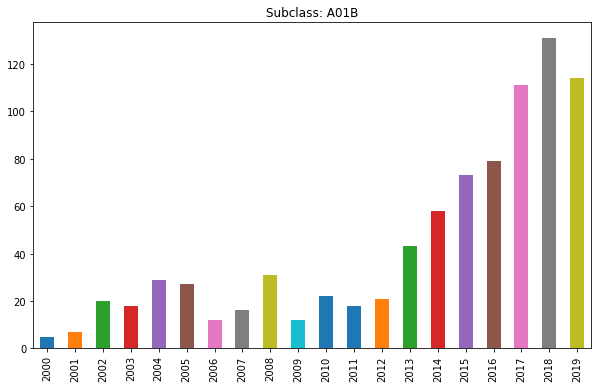

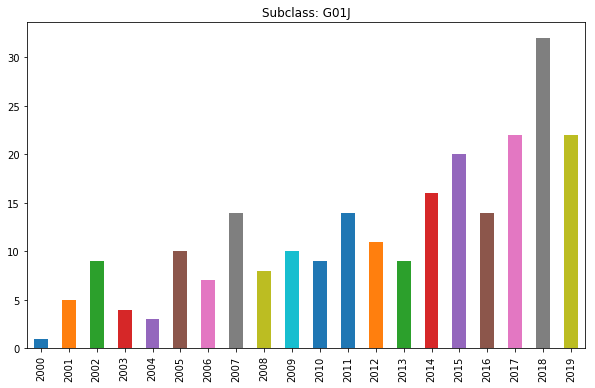

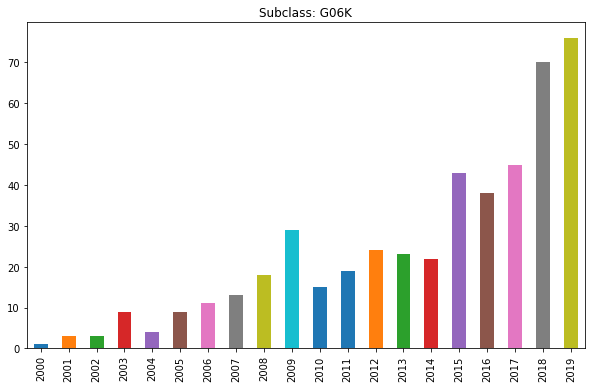

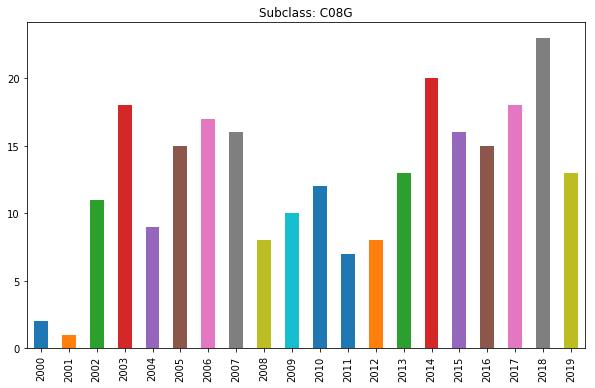

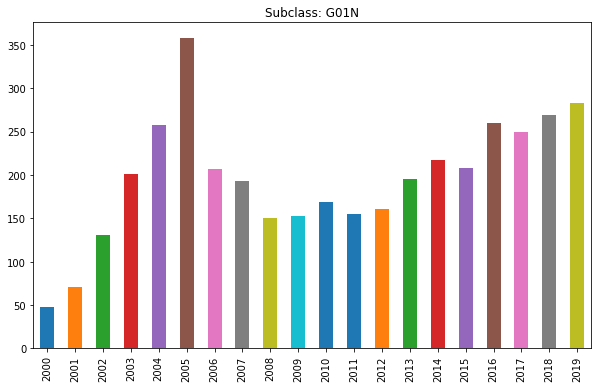

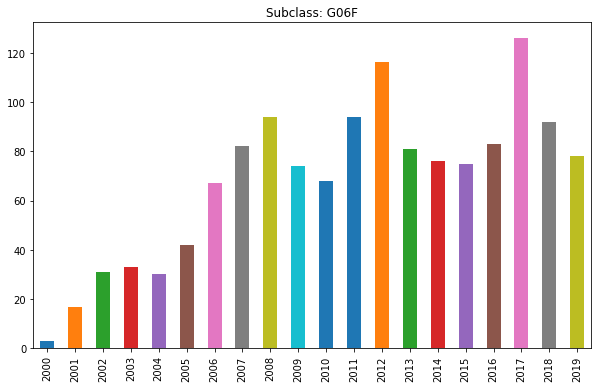

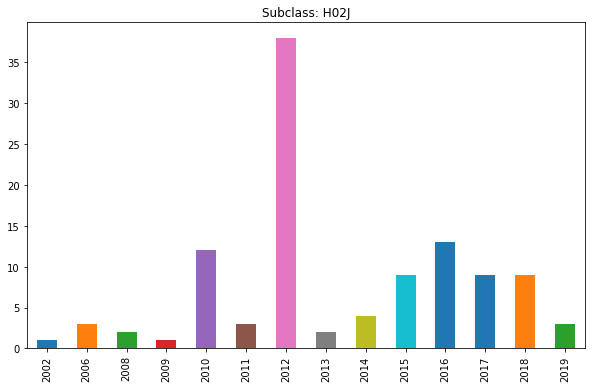

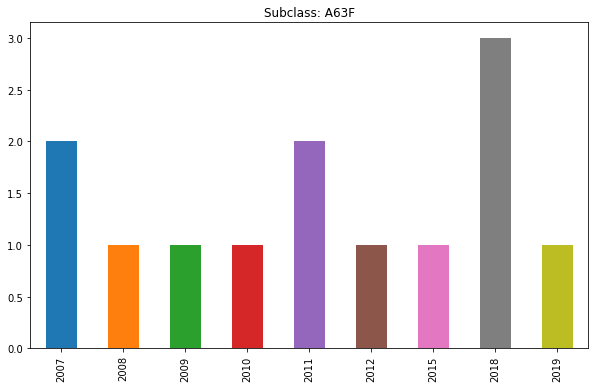

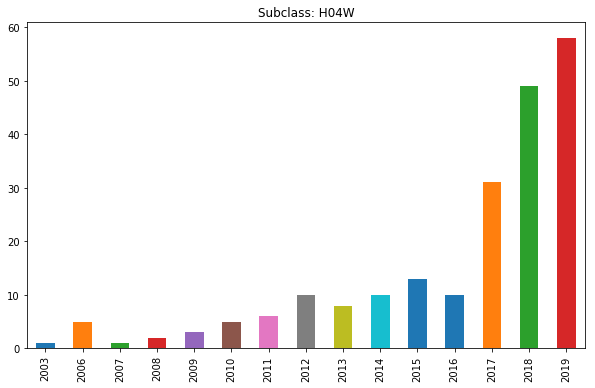

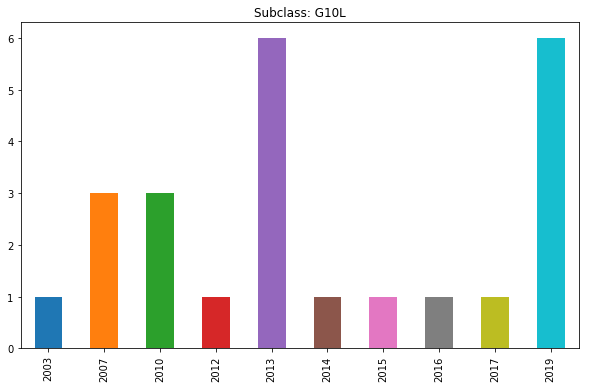

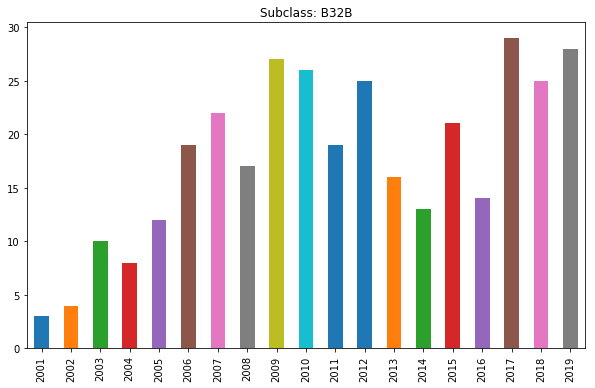

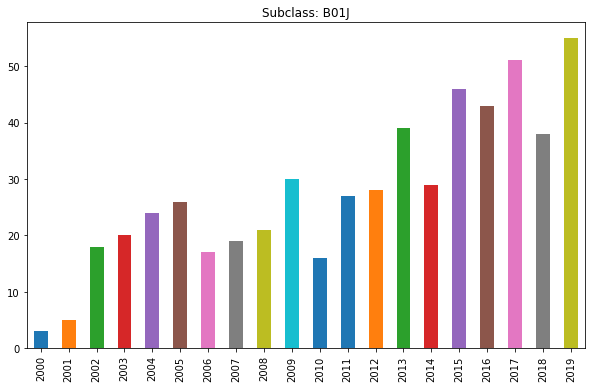

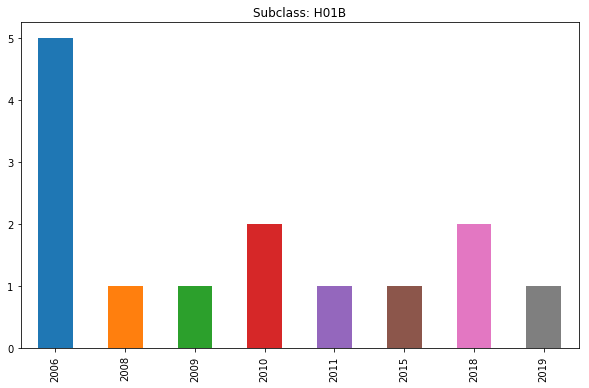

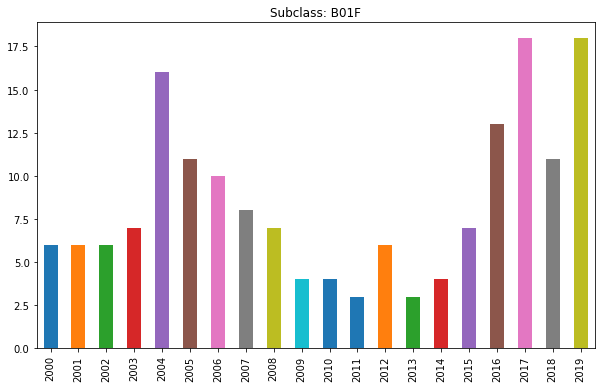

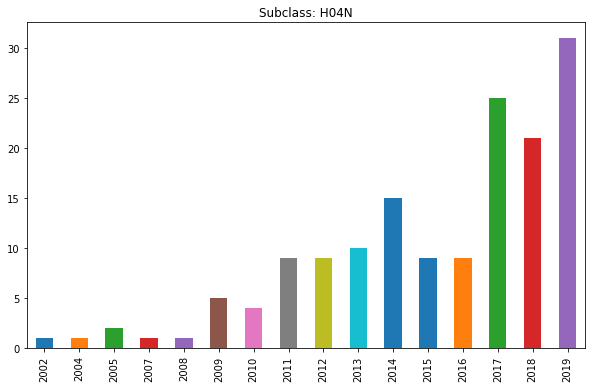

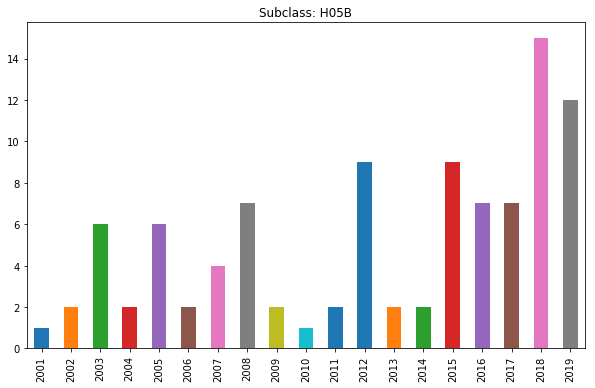

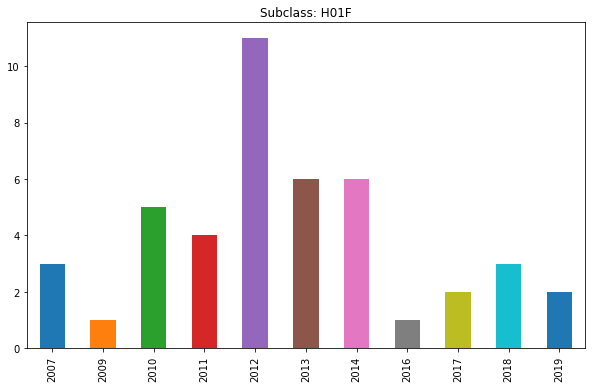

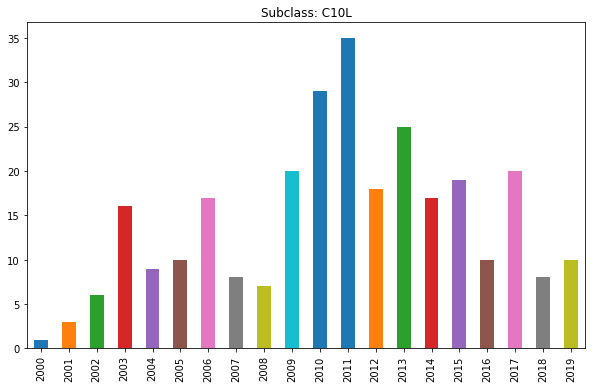

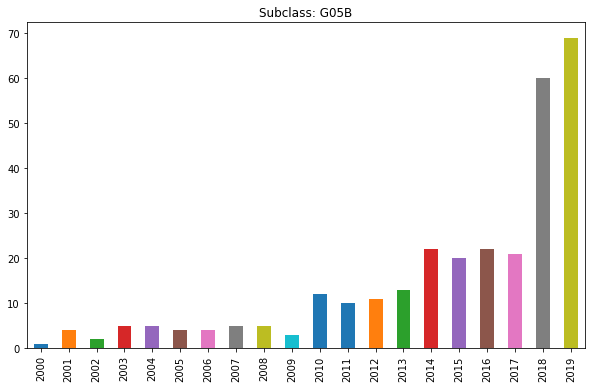

In [55]:
for sc in extracted_subclasses:
    df_subclass = data_set.loc[data_set['Main_Subclass'] == sc]
    s = df_subclass['Publication_Year'].value_counts().sort_values(ascending=True)
    s.sort_index(inplace=True)
    s.plot.bar(figsize=(10,6))
    plt.title("Subclass: " + sc, fontsize=12)
    plt.show()

In [56]:
# Abbiamo sottoclassi selezionate
affirmed_subclasses = ['C12N','A61K','G01N','A01H','A01N','C07K','C12P','G06Q','C12Q','A01C','G06F','A01G','A01B','C02F','A01D','C07D','A61B','B05B','A23K','B62D','A01F','C12N','G01N','A01N','C12Q','A01C','G06F','A01G','A01B','C02F','A01D','A61B','B05B','H02J','H01L','G06F','A61B']

In [57]:
f = open(current_path + "\\OutputFiles\\List of affirmed sectors.txt", "w")
for sc in affirmed_subclasses:
    f.write(sc +'\n')
f.close()

# 4. Extraction of groups from the selected affirmed subclasses

In [58]:
ipc_group_code_list = []
for idx in range(len(data_set)):
    ipc_code = data_set.loc[idx,"IPCR_Classifications"].split(";;")
    for ipc in ipc_code:
        ipc_group_code_list.append(ipc.split('/')[0])
        
ipc_group_code_list = list(set(ipc_group_code_list))

In [59]:
selected_group = []
for group in ipc_group_code_list:
    if group[0:4] in affirmed_subclasses:
        selected_group.append(group)

In [60]:
print(ipc_group_code_list)

['C09C3', 'B65H75', 'C08L47', 'A23P30', 'E04D12', 'D02G1', 'F23D11', 'C08F290', 'A01G5', 'H02P27', 'B25H7', 'B27D1', 'A23L13', 'A22C25', 'B41M5', 'C08F271', 'C07K5', 'B81C1', 'C08L73', 'C08G67', 'F16F15', 'F21Y113', 'B22F9', 'F26B7', 'C07C247', 'E02B3', 'H01R4', 'H02G9', 'B21D51', 'C02F101', 'H01Q9', 'E05F3', 'C07C319', 'F16B39', 'B82Y15', 'H02P3', 'A01N27', 'C12P5', 'C08F263', 'A01C17', 'G06Q90', 'C08L35', 'B62D17', 'F41H3', 'B60P7', 'B25J9', 'B22F1', 'F27B14', 'G01B5', 'G01F7', 'B05B15', 'C08G79', 'G11C13', 'A61Q19', 'A61K33', 'C22F1', 'C10B19', 'A61B1', 'A61F9', 'D06P3', 'B62M11', 'B23P13', 'B01F3', 'H03H17', 'G06F17', 'B65B3', 'F25B21', 'H02J1', 'A01K51', 'C22B43', 'G03H1', 'F28F17', 'A01D44', 'F24S70', 'A21D6', 'C09D155', 'F27B9', 'A01B47', 'C11D10', 'E21F7', 'H04B13', 'C09D183', 'F16H25', 'C03C15', 'F24H7', 'A01K29', 'A62B35', 'B24B37', 'B23B19', 'B60B33', 'G06T9', 'G01P3', 'C01B32', 'A01B39', 'F16D43', 'F16D65', 'B61C15', 'E02B8', 'C01D13', 'H02K51', 'B65F9', 'C22C22', 'B63B39',

#### Analysis with Lens Classification Explorer